In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv("../DataSets/MNIST_train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv("../DataSets/MNIST_test.csv")
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#generating x_train,y_train from train data
 
x_train = train.drop(columns = "label").values
 
y_train = train["label"].values
 
x_test=test.values

In [5]:
x_train.shape

(42000, 784)

In [6]:
y_train.shape

(42000,)

In [7]:
x_test.shape

(28000, 784)

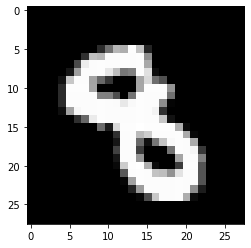

In [8]:
plt.imshow(x_train[67].reshape(28, 28), cmap = "gray")
plt.show()

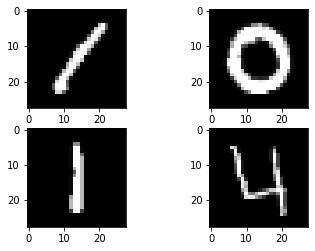

In [9]:
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap = "gray")

### Scaling of data with Standard Scaler

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(x_train)

sc_x_train = sc.transform(x_train)
sc_x_test = sc.transform(x_test)

### PCA transformation of Data

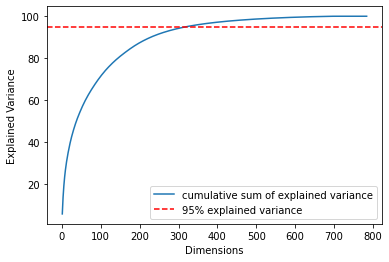

In [11]:
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(sc_x_train)

val = np.cumsum(pca.explained_variance_ratio_)*100

plt.plot(range(1,len(val)+1), val, label = "cumulative sum of explained variance")
plt.axhline(y = 95, color = "r", linestyle = "--", label = "95% explained variance")
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.legend()
plt.show()

In [ ]:
pca = PCA(n_components = 0.95)
 
pca.fit(sc_x_train)
 
pca_x_train = pca.transform(sc_x_train)
 
pca_x_test = pca.transform(sc_x_test)
 
print("Selected Components : ", pca.n_components_)

### Visualization data before PCA and After PCA

In [ ]:
data_point = x_train[1].reshape(28, 28)

pca_data_point = pca.inverse_transform(pca_x_train[1]).reshape(28, 28)

plt.subplot(1, 2, 1)
plt.imshow(data_point, cmap = "gray")
plt.title("Original Data")
plt.subplot(1, 2, 2)
plt.imshow(pca_data_point, cmap = "gray")
plt.title("Data After PCA")

## Classification of Handwritten Digits data using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

start_time = datetime.datetime.now()

model.fit(pca_x_train, y_train)

end_time = datetime.datetime.now()
print("Time Taken by model to train data is : ",str(end_time-start_time))

In [ ]:
start_time = datetime.datetime.now()
y_pred = model.predict(pca_x_train)
end_time = datetime.datetime.now()
print("Time Taken by model to Predict the output on test data is : ", str(end_time-start_time))

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy is : ", accuracy_score(y_train, y_pred))
 
print(classification_report(y_train, y_pred))
 
cm=confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot = True)

In [ ]:
start_time = datetime.datetime.now()
y_pred = model.predict(pca_x_test)
end_time = datetime.datetime.now()
print("Time Taken by model to Predict the output on test data is : ",str(end_time-start_time))

In [ ]:
output = pd.DataFrame(y_pred, columns = ["label"])
output.to_csv("test_labels.csv")